!pip3 install pandas

In [3]:
#import libraries

import mysql.connector
from mysql.connector import Error
import pandas as pd

In [8]:
#function to create server connection
def server_conn(host_name,user_name,user_password):
    connection = None
    try:
        connection = mysql.connector.connect(host=host_name, 
                                             user=user_name, 
                                             passwd=user_password)
        print('Database Connection Established')
    except Error as err:
        print("Error-",err)
    return connection

connection = server_conn("localhost","root","725@Mysql")
print(connection)

Database Connection Established


In [9]:
#function to create a database
def create_db(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        print("Database Created Successfully")
    except:
        print("Error-",err)
        
database_create_query = "Create database mysql_db"
create_db(connection,database_create_query)

Database Created Successfully


In [13]:
#Connection to database
def db_connection(host_name,user_name,user_password , db_name):
    connection = None
    try:
        connection = mysql.connector.connect(host=host_name, 
                                             user=user_name, 
                                             passwd=user_password,
                                             database=db_name)
        print('Database Connection Established')
    except Error as err:
        print("Error-",err)
    return connection

In [16]:
#function to execute sql querries

def execute_query(connection,query):
    cursor = connection.cursor()
    try:
        cursor.execute(query)
        connection.commit()
        print("Querry Executed")
    except Error as err:
        print("Error-",err)

In [18]:
#create a table to maintain product order history
create_ord_table = """
create table order_details(
order_id int primary key, 
consumer_name varchar(35) , 
prod_name varchar(25),
quantity int,
order_date date,
price float,
contact varchar(25));
"""

#database connection
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
execute_query(connection,create_ord_table)

Database Connection Established
Querry Executed


In [20]:
#Insert data into the table

order_info = """
insert into order_details values
(111, 'John', 'Trimmer', 3, '2022-05-12', 450, '6544679865567'),
(112, 'Jerry', 'Tablet', 2, '2022-05-06', 4500, '654434567'),
(113, 'Joe', 'Mouse', 5, '2022-05-09', 250, '65434567'),
(114, 'David', 'Monitor', 1, '2022-05-11', 1500, '65446123456'),
(115, 'Bipul', 'Keyboard', 7, '2022-05-15', 350, '654234567'),
(116, 'Samuel', 'Bottle', 8, '2022-05-22', 50, '6544234556');
"""

connection = db_connection("localhost","root","725@Mysql", "mysql_db")
execute_query(connection,order_info)

Database Connection Established
Querry Executed


In [23]:
#Read the data table

def read_table(connection,query):
    cursor = connection.cursor()
    result = None
    try:
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as err:
        print("Error-",err)


In [24]:
#execute read function

read_query = "select * from order_details"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
(111, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 450.0, '6544679865567')
(112, 'Jerry', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '654434567')
(113, 'Joe', 'Mouse', 5, datetime.date(2022, 5, 9), 250.0, '65434567')
(114, 'David', 'Monitor', 1, datetime.date(2022, 5, 11), 1500.0, '65446123456')
(115, 'Bipul', 'Keyboard', 7, datetime.date(2022, 5, 15), 350.0, '654234567')
(116, 'Samuel', 'Bottle', 8, datetime.date(2022, 5, 22), 50.0, '6544234556')


In [25]:
read_query = "select consumer_name,prod_name,contact from order_details"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
('John', 'Trimmer', '6544679865567')
('Jerry', 'Tablet', '654434567')
('Joe', 'Mouse', '65434567')
('David', 'Monitor', '65446123456')
('Bipul', 'Keyboard', '654234567')
('Samuel', 'Bottle', '6544234556')


In [27]:
read_query = "select consumer_name,year(order_date) from order_details"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
('John', 2022)
('Jerry', 2022)
('Joe', 2022)
('David', 2022)
('Bipul', 2022)
('Samuel', 2022)


In [29]:
#run a query to find orders before 11-05-22
read_query = "select * from order_details where order_date < '2022-05-11'"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
(112, 'Jerry', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '654434567')
(113, 'Joe', 'Mouse', 5, datetime.date(2022, 5, 9), 250.0, '65434567')


In [30]:
#execute query to access order by price in ascending form
read_query = "select * from order_details order by price"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
(116, 'Samuel', 'Bottle', 8, datetime.date(2022, 5, 22), 50.0, '6544234556')
(113, 'Joe', 'Mouse', 5, datetime.date(2022, 5, 9), 250.0, '65434567')
(115, 'Bipul', 'Keyboard', 7, datetime.date(2022, 5, 15), 350.0, '654234567')
(111, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 450.0, '6544679865567')
(114, 'David', 'Monitor', 1, datetime.date(2022, 5, 11), 1500.0, '65446123456')
(112, 'Jerry', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '654434567')


In [37]:
db_info = []

for res in results:
    db_info.append(list(res))
    
col_names = ["Order_ids","Name","Item","Quantity","Date_Ordered","Unit_price","Contact"]
    
df = pd.DataFrame(db_info , columns=col_names)

In [38]:
print(db_info)

[[116, 'Samuel', 'Bottle', 8, datetime.date(2022, 5, 22), 50.0, '6544234556'], [113, 'Joe', 'Mouse', 5, datetime.date(2022, 5, 9), 250.0, '65434567'], [115, 'Bipul', 'Keyboard', 7, datetime.date(2022, 5, 15), 350.0, '654234567'], [111, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 450.0, '6544679865567'], [114, 'David', 'Monitor', 1, datetime.date(2022, 5, 11), 1500.0, '65446123456'], [112, 'Jerry', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '654434567']]


In [39]:
df

,Order_ids,Name,Item,Quantity,Date_Ordered,Unit_price,Contact
0,116,Samuel,Bottle,8,2022-05-22,50.0,6544234556
1,113,Joe,Mouse,5,2022-05-09,250.0,65434567
2,115,Bipul,Keyboard,7,2022-05-15,350.0,654234567
3,111,John,Trimmer,3,2022-05-12,450.0,6544679865567
4,114,David,Monitor,1,2022-05-11,1500.0,65446123456
5,112,Jerry,Tablet,2,2022-05-06,4500.0,654434567


In [45]:
df['Total_Paid_Amount'] = df.Quantity * df.Unit_price

In [46]:
df

,Order_ids,Name,Item,Quantity,Date_Ordered,Unit_price,Contact,Total_Paid_Amount
0,116,Samuel,Bottle,8,2022-05-22,50.0,6544234556,400.0
1,113,Joe,Mouse,5,2022-05-09,250.0,65434567,1250.0
2,115,Bipul,Keyboard,7,2022-05-15,350.0,654234567,2450.0
3,111,John,Trimmer,3,2022-05-12,450.0,6544679865567,1350.0
4,114,David,Monitor,1,2022-05-11,1500.0,65446123456,1500.0
5,112,Jerry,Tablet,2,2022-05-06,4500.0,654434567,9000.0


!pip3 install matplotlib

<AxesSubplot:xlabel='Item'>

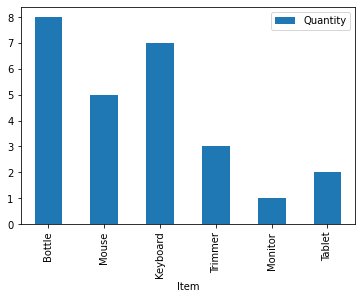

In [48]:
df[['Item','Quantity']].plot.bar(x='Item' , y='Quantity')

In [50]:
#update query

update_query = "update order_details set price = 400 where order_id = 111"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = execute_query(connection,update_query)

Database Connection Established
Querry Executed


In [53]:
#read info for id 111
read_q111 = "select * from order_details where order_id = 111"

connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_q111)


for res in results:
    print(res)

Database Connection Established
(111, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 400.0, '6544679865567')


In [54]:
#delete query

delete_order = "delete from order_details where order_id = 113"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
execute_query(connection,delete_order)

Database Connection Established
Querry Executed


In [55]:
#read final
read_query = "select * from order_details order by price"
connection = db_connection("localhost","root","725@Mysql", "mysql_db")
results = read_table(connection,read_query)
for res in results:
    print(res)

Database Connection Established
(116, 'Samuel', 'Bottle', 8, datetime.date(2022, 5, 22), 50.0, '6544234556')
(115, 'Bipul', 'Keyboard', 7, datetime.date(2022, 5, 15), 350.0, '654234567')
(111, 'John', 'Trimmer', 3, datetime.date(2022, 5, 12), 400.0, '6544679865567')
(114, 'David', 'Monitor', 1, datetime.date(2022, 5, 11), 1500.0, '65446123456')
(112, 'Jerry', 'Tablet', 2, datetime.date(2022, 5, 6), 4500.0, '654434567')


In [56]:
db_info = []

for res in results:
    db_info.append(list(res))
    
col_names = ["Order_ids","Name","Item","Quantity","Date_Ordered","Unit_price","Contact"]
    
df = pd.DataFrame(db_info , columns=col_names)

In [57]:
df

,Order_ids,Name,Item,Quantity,Date_Ordered,Unit_price,Contact
0,116,Samuel,Bottle,8,2022-05-22,50.0,6544234556
1,115,Bipul,Keyboard,7,2022-05-15,350.0,654234567
2,111,John,Trimmer,3,2022-05-12,400.0,6544679865567
3,114,David,Monitor,1,2022-05-11,1500.0,65446123456
4,112,Jerry,Tablet,2,2022-05-06,4500.0,654434567


<AxesSubplot:xlabel='Item'>

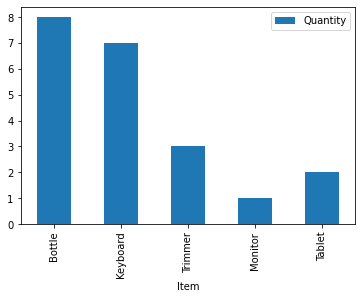

In [58]:
df[['Item','Quantity']].plot.bar(x='Item' , y='Quantity')